<a href="https://colab.research.google.com/github/toobask/introtoAI1/blob/main/IntroToAI_701_CourseWork_Amua_et_Tooba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessary Libraries

In [17]:
import pandas as pd
import numpy as np

from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Exploratory Data Analysis

In [22]:
#load diabetes dataset
diabetes_df = pd.read_csv("../dataset/diabetes.csv")

In [23]:
#inspect first 5 rows
diabetes_df[:5]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [24]:
#check shape of df
diabetes_df.shape
print(f"This dataframe contains {diabetes_df.shape[0]} rows and {diabetes_df.shape[1]} columns.")

This dataframe contains 70692 rows and 22 columns.


In [25]:
#displaying column names
diabetes_df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [26]:
#check for missing values in target column
pd.isnull(diabetes_df["Diabetes_binary"]).values.any()

False

In [27]:
#check for missing values in df
diabetes_df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [28]:
#check df info
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [30]:
#map int values to the float values in target variable for better representation
diabetes_df["Diabetes_binary"] = diabetes_df["Diabetes_binary"].map({0.0 :  0, 1.0 : 1})

In [31]:
#convert dtype of target to reflect categorical object
diabetes_df["Diabetes_binary"] = diabetes_df["Diabetes_binary"].astype("category")

In [33]:
#view conversion
diabetes_df["Diabetes_binary"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 70692 entries, 0 to 70691
Series name: Diabetes_binary
Non-Null Count  Dtype   
--------------  -----   
70692 non-null  category
dtypes: category(1)
memory usage: 69.3 KB


In [34]:
#describe dataframe
diabetes_df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [35]:
#inspect class distribution
diabetes_dist = diabetes_df.groupby('Diabetes_binary').size()
diabetes_dist

Diabetes_binary
0    35346
1    35346
dtype: int64

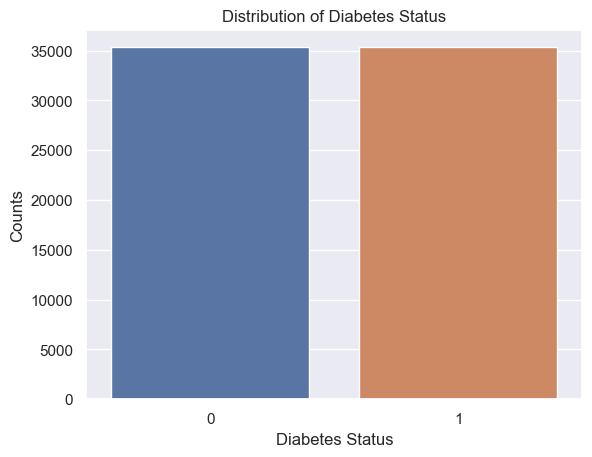

In [36]:
#plot the class distribution
sns.barplot(x=diabetes_dist.index, y=diabetes_dist.values)
plt.title("Distribution of Diabetes Status")
plt.xlabel("Diabetes Status")
plt.ylabel("Counts")
plt.show()

In [37]:
#define a dictionary to map the numerical values of the target varaible to the class name
#Class 0 is No Diabetes and Class 1 is Diabetes
classNames = {0: "No Diabetes", 1: "Diabetes"}

## Data Preprocessing

#### Split Data (Features Matrix and Target Array)

In [55]:
#split dataframe into features and target
X = diabetes_df.drop("Diabetes_binary", axis=1)
y = diabetes_df['Diabetes_binary']

In [57]:
#check first 5 rows of the features matrix and target array
display(X.head(), y.head())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


#### Splitting Data into train and tests

In [71]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [72]:
#display the train data
display(X_train.shape, y_train.shape)

(56553, 21)

(56553,)

In [74]:
#display the test data

display(X_test.shape, y_test.shape)

(14139, 21)

(14139,)

## Model Development

### Baseline model

In [75]:
baseline_model = LogisticRegression()
baseline_model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
#predict on test data
y_predict = baseline_model.predict(X_test)

In [78]:
# check accuracy
accuracy= accuracy_score(y_test, y_predict)
print("baseline accuracy is ", accuracy)

baseline accuracy is  0.7446778414315015
